<h1 style="font-size:20px soild"><b>K-Means Clustering on Video Game DataSet</b></h1>

<p>This Project is a part of self-learning and enhancement of knowledge in the field of Data Science and Machine Learning</p>

<p>In this Project, We will evaluate the performance and power of model that been trained and tested on data collected from Kaggle Datasets(ml-course). A model trainded on this data that is seen a good fit could be used to make certain <b>Cluster Analysis</b> to group data according to specific clusters.</p>

<h3><b>Dataset Description:</b></h3>

<p><b>Video-Game-Analysis:</b>
       The Dataset was drived from Ml-course datasets from Kaggle Website. 
       The Dataset Contains 16 set of Attributes which includes:-<br> 
       <b>Name:</b> Name of the Video Game.<br>
       <b>Platfrom:</b> Platform on which it was released on <br>
       <b>Year of Release:</b> Year<br>
       <b>Genre:</b> Type of the Game<br>
       <b>Publisher:</b> Name of the Publisher<br>
       <b>NA Sales:</b> Sales in North America in Million Dollars<br>
       <b>EU Sales:</b>Sales in Europe in Million Dollars <br>
       <b>JP Sales:</b>Sales in Japan in Million Dollars <br>
        <b>Other Sales:</b>Sales in Other countries in Million Dollars <br>
        <b>Global Sales:</b>Gross Sales in Million Dollars <br>
        <b>Critic Score:</b>Score given by Critics <br>
        <b>Critic Count:</b>Number of Critices <br>
        <b>User Score:</b>Score given by Users <br>
        <b>User Count:</b>Number Of Users <br>
        <b>Developer:</b>Name of the Developer<br>
        <b>Rating:</b>Rating given by <b>ESRB</b> <br>
       There 16719 set of varibles in this dataset. 
        
</p>

<p>We'll start with the reading in the data and Analysing the data with Pandas Library</p>

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Data Importing and Preprocessing Phase
df = pd.read_csv("video_games_sales.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape #verifying the entries.

(16719, 16)

In [5]:
df.groupby('Publisher').size()

Publisher
10TACLE Studios                             3
1C Company                                  3
20th Century Fox Video Games                5
2D Boy                                      1
3DO                                        36
49Games                                     1
505 Games                                 191
5pb                                        62
7G//AMES                                    3
989 Sports                                  1
989 Studios                                14
AQ Interactive                              5
ASC Games                                   3
ASCII Entertainment                        20
ASCII Media Works                           9
ASK                                         1
Abylight                                    1
Acclaim Entertainment                     186
Accolade                                    3
Ackkstudios                                10
Acquire                                    13
Activision              

In [6]:
top5publisher = df.groupby('Publisher', sort=False).size()
top5publisher = top5publisher.head()

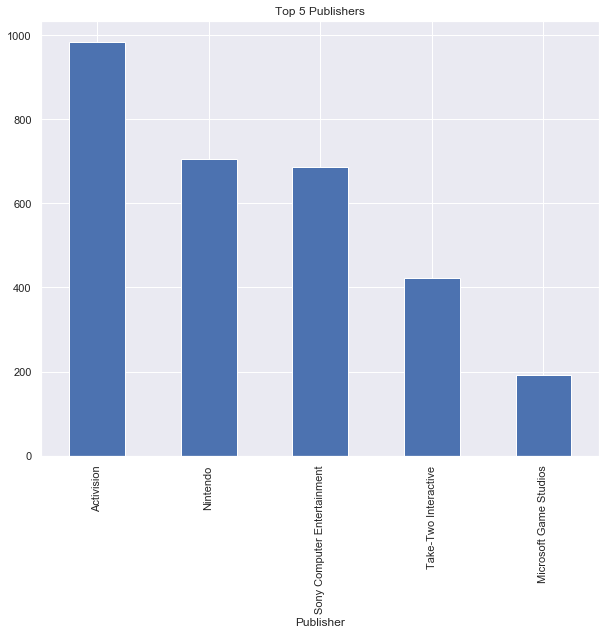

In [7]:
sns.set(rc={'figure.figsize':(10.0,8.0)})
top5publisher=top5publisher.sort_values(ascending=False)
top5publisher.plot.bar()
plt.title("Top 5 Publishers")
plt.show()

In [8]:
year_of_real = df.groupby(['Year_of_Release', 'Global_Sales']).size()

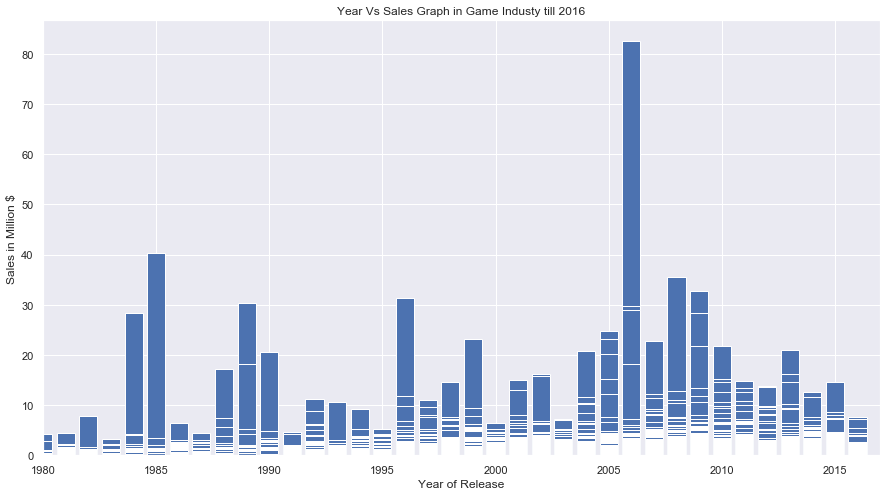

In [9]:
sns.set(rc={'figure.figsize':(15.0,8.0)})
plt.bar(df['Year_of_Release'],df['Global_Sales'])
plt.xlabel('Year of Release')
plt.xlim(1980,2017)
plt.ylabel('Sales in Million $')
plt.title("Year Vs Sales Graph in Game Industy till 2016")
plt.show()

In [10]:
#user Ratings
df = df.set_index(df['Name'])
Top5user = df.User_Score.sort_values(ascending=False)
Top5user = Top5user.head()

In [11]:
Top5user

Name
Men in Black II: Alien Escape                        tbd
LEGO Ninjago: Shadow of Ronin                        tbd
Jake Hunter Detective Story: Memories of the Past    tbd
Contra Advance: The Alien Wars EX                    tbd
EA Replay                                            tbd
Name: User_Score, dtype: object

In [12]:
#Top 5 Grossing Games
Top5gross = df.Global_Sales.sort_values(ascending=False)
Top5gross = Top5gross.head()

In [13]:
Top5gross

Name
Wii Sports                  82.53
Super Mario Bros.           40.24
Mario Kart Wii              35.52
Wii Sports Resort           32.77
Pokemon Red/Pokemon Blue    31.37
Name: Global_Sales, dtype: float64

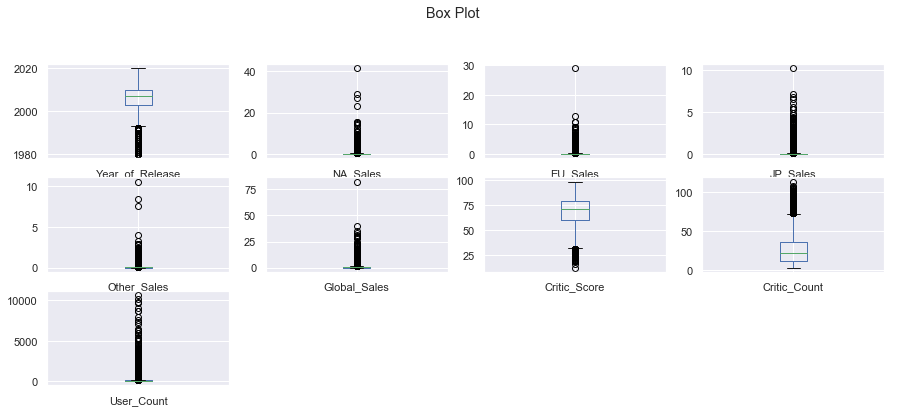

In [14]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False,title='Box Plot')
plt.show()

<p>The outliers are much higher stating there is abnormality in the dataset which consisting of plenty of null values. </p>


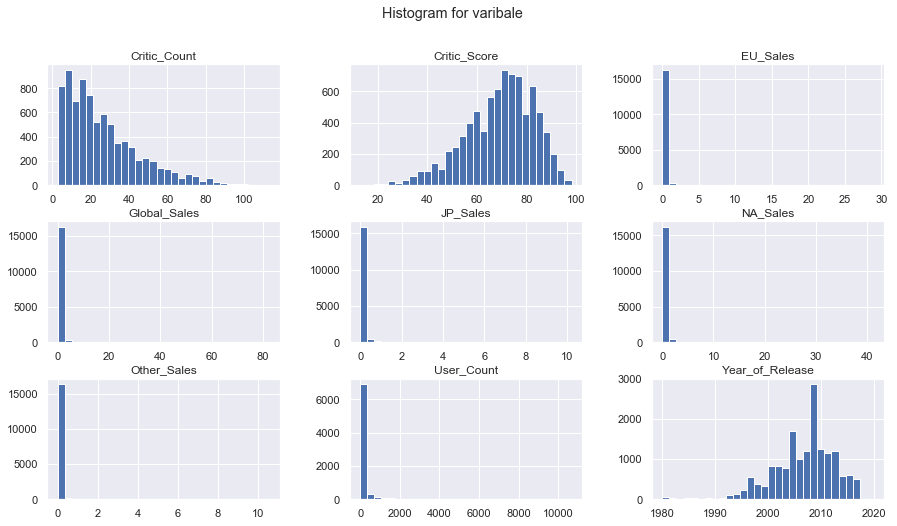

In [15]:
df.hist(bins=30)
plt.suptitle("Histogram for varibale")
plt.show()

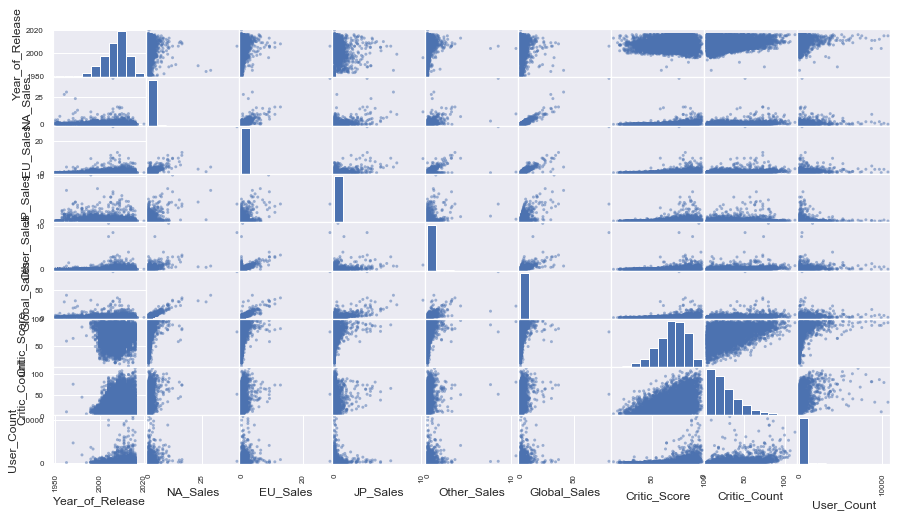

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [17]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [99]:
df3 = df.copy()
df.isnull().sum() #Number of Null values in the dataset.

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         2425
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [19]:
df['Year_of_Release'].fillna(method='ffill',inplace = True)

In [20]:
df['Critic_Score'].fillna((df['Critic_Score'].mean()),inplace = True)
df['User_Score'].fillna((df['Critic_Score'].mean()),inplace = True)
df['Critic_Count'].fillna((df['Critic_Count'].mean()),inplace = True)
df['User_Count'].fillna((df['Critic_Count'].mean()),inplace = True)

In [21]:
df.isnull().sum() #Number of Null values in the dataset.

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [22]:
#Treating The Missing/Null Values
from sklearn.impute import SimpleImputer

In [27]:
df.replace('tbd',np.nan,inplace=True)

In [28]:
values = df.iloc[:,5:13].values
imputer = SimpleImputer()
trans_values = imputer.fit_transform(values)
print(np.isnan(trans_values).sum())

0


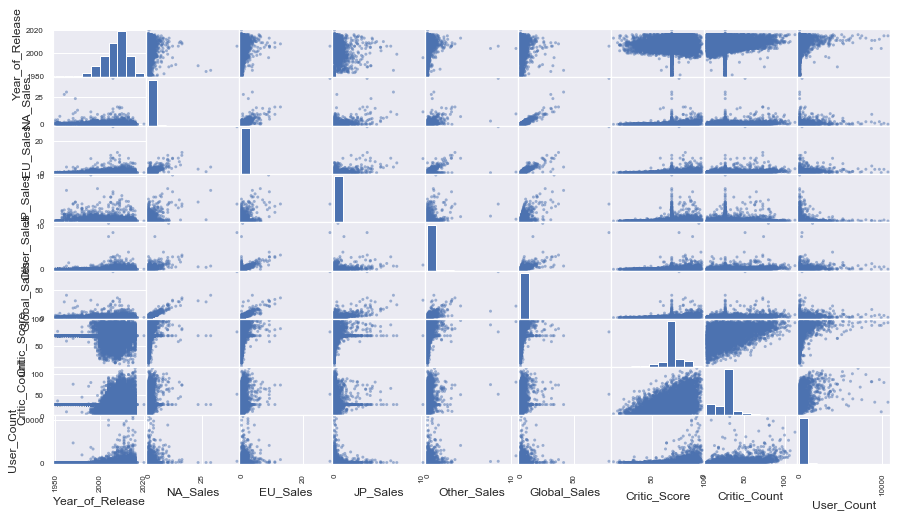

In [29]:
scatter_matrix(df)
plt.show()

<h4><b>Building Model with Sklearn</b></h4>

In [31]:
from sklearn.cluster import KMeans

In [32]:
X = df.iloc[:,[11,13]].values

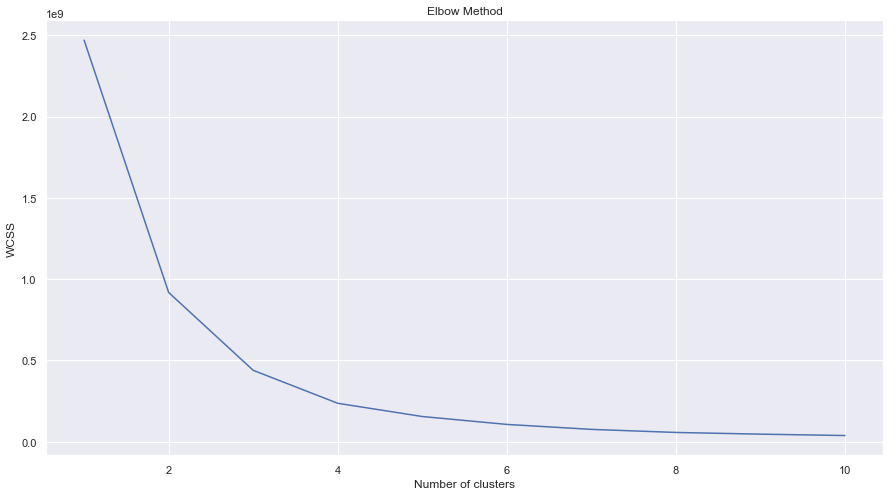

In [33]:
#using the elbow method
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.title("Elbow Method")
plt.ylabel("WCSS")
plt.show()

In [34]:
#implemnting the kmeans
kmean = KMeans(n_clusters=3,init="k-means++", max_iter=300, n_init=10)
y_kmeans = kmean.fit_predict(X)

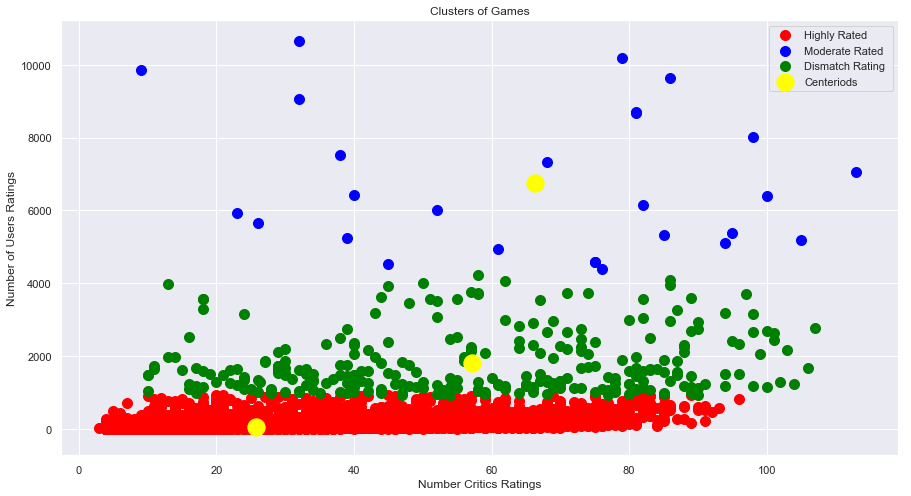

In [35]:
#visualizing the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c="red", label="Highly Rated ")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c="blue", label="Moderate Rated")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c="green", label="Dismatch Rating ")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=300, c="yellow", label="Centeriods")
plt.legend()
plt.title("Clusters of Games")
plt.xlabel("Number Critics Ratings")
plt.ylabel("Number of Users Ratings")
plt.show()

<h4>Removing The Null values and better preprocesing Training to compare the graph</h4>

In [100]:
df3.dropna(inplace=True)

In [101]:
df3.shape

(7569, 16)

In [71]:
df3

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,,
Wii Sports,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
Mario Kart Wii,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
Wii Sports Resort,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
New Super Mario Bros.,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.5,431.000000,Nintendo,E
Wii Play,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.6,129.000000,Nintendo,E
New Super Mario Bros. Wii,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.4,594.000000,Nintendo,E
Mario Kart DS,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.000000,64.000000,8.6,464.000000,Nintendo,E
Wii Fit,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.000000,63.000000,7.7,146.000000,Nintendo,E
Kinect Adventures!,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.000000,45.000000,6.3,106.000000,Good Science Studio,E


In [102]:
df3['User_Score'] = pd.to_numeric(df3['User_Score'])

In [103]:
df3['User_Score'] = df3['User_Score'] * 10

In [125]:
df4 = df3[df3['User_Score'] <= 100]
df4 = df3[df3['Critic_Score'] <= 100]

In [126]:
df4.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,,
Wii Sports,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
Mario Kart Wii,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
Wii Sports Resort,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
New Super Mario Bros.,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
Wii Play,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


In [127]:
X = df3.iloc[:,[10,12]].values

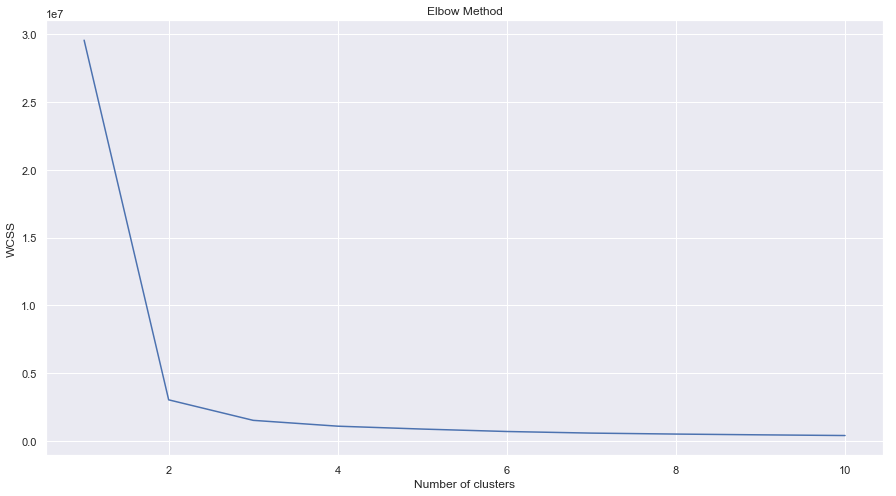

In [128]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.title("Elbow Method")
plt.ylabel("WCSS")
plt.show()

In [135]:
#implemnting the kmeans
kmean = KMeans(n_clusters=4,init="k-means++", max_iter=300, n_init=10)
y_kmeans = kmean.fit_predict(X)

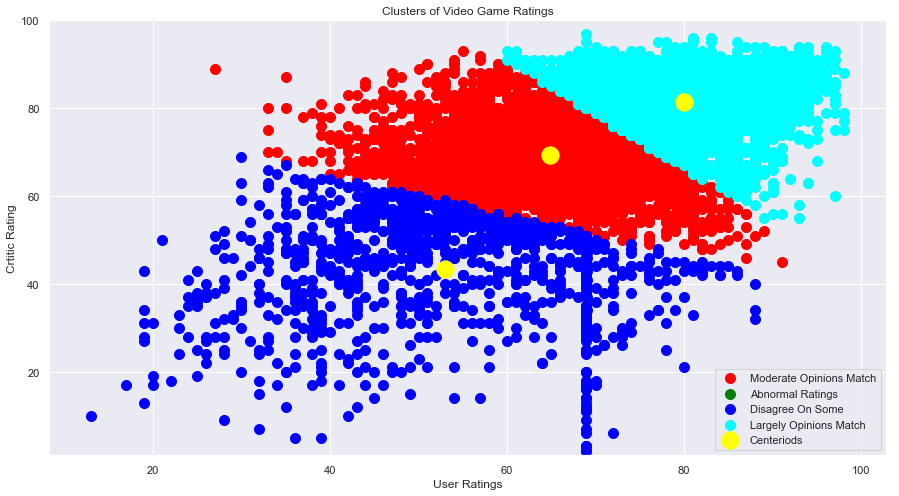

In [139]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c="red", label="Moderate Opinions Match")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c="green", label="Abnormal Ratings")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c="blue", label="Disagree On Some")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c="cyan", label="Largely Opinions Match")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=300, c="yellow", label="Centeriods")
plt.legend()
plt.title("Clusters of Video Game Ratings")
plt.ylim(1,100)
plt.xlabel("User Ratings")
plt.ylabel("Crtitic Rating")
plt.show()

<p>
Pre-Processig Data had a huge impact on the model where it could easily create clusters of Ratings from User and cirtics </p>

<h4><b>Conclusion</b></h4>

<p>This Finishes the Project. We have built a 3 Clusters to determine weathere the Rating of users matches with the critics.</p>
<ul>
<li><b>Though Filling up the NAN values with Mean values of the colmuns didnt provide Better insights</b></li>
<li><b>The User Rating would be dependent number of Ratings some of the ratings would be false rating which wouldn't give correct information about the game and its performance. </b></li>  
<li><b>The features present in data are already catgorized into the ESRB Rating some consists of Null Values our model would be sufficient to describe based on the Ratings as those rating are dependent on what type of game beinging Released</b></li>
 <li><b>The comparision of old and new game has a vast difference in technology used to build and begin played with where is starts from console to VR. The rating also differs as the year progresses and new technology is introduced into the gaming industry.</b></li>
<li><b>The data was collected from 1980 till 2016.from 1980-2000 data is not relevant today as most of the console, game have been out of serivce or people stopped playing anymore.</b></li>
</ul>